Get S&P Cryptocurrency Top 10 Equal Weight Index

"The S&P Cryptocurrency Top 5 and Top 10... are market capitalization weighted... \[this] refers to the product of coin supply at a given point in time multiplied by coin price"

\- S&P Global

In [84]:
import pandas as pd

ten_year_data = 'https://www.spglobal.com/spdji/en/idsexport/file.xls?hostIdentifier=48190c8c-42c4-46af-8d1a-0cd5db894797&redesignExport=true&languageId=1&selectedModule=PerformanceGraphView&selectedSubModule=Graph&yearFlag=tenYearFlag&indexId=92418716'
five_year_data = 'https://www.spglobal.com/spdji/en/idsexport/file.xls?hostIdentifier=48190c8c-42c4-46af-8d1a-0cd5db894797&redesignExport=true&languageId=1&selectedModule=PerformanceGraphView&selectedSubModule=Graph&yearFlag=fiveYearFlag&indexId=92418716'
three_year_data = 'https://www.spglobal.com/spdji/en/idsexport/file.xls?hostIdentifier=48190c8c-42c4-46af-8d1a-0cd5db894797&redesignExport=true&languageId=1&selectedModule=PerformanceGraphView&selectedSubModule=Graph&yearFlag=threeYearFlag&indexId=92418716'
one_year_data = 'https://www.spglobal.com/spdji/en/idsexport/file.xls?hostIdentifier=48190c8c-42c4-46af-8d1a-0cd5db894797&redesignExport=true&languageId=1&selectedModule=PerformanceGraphView&selectedSubModule=Graph&yearFlag=oneYearFlag&indexId=92418716'


def select_data():
    # Define a dictionary to map numbers to strings
    url_mapping = {
        1: one_year_data,
        5: five_year_data,
        10: ten_year_data
    }
    # Prompt the user to choose a number
    user_input = input(">   Please choose number of years to see historical data for: ")
    # Convert the user input from string to integer
    number = int(user_input)
    # Check if the user's input exists in the dictionary
    if number in url_mapping:
        # Print the corresponding string
        url_specified = url_mapping[number]
    else:
        print(">    Invalid input. Please choose 1, 5, or 10.")

    response = requests.get(url_specified)

    # Save Excel file
    if response.status_code == 200:
        # Read the Excel file content into a DataFrame, specifying only columns A and B
        data = pd.read_excel(response.content, usecols="A:B")

        # Drop any rows with NaN values
        data = data.dropna()

        # Format .csv
        data = data.iloc[2:]
        data = data.rename(columns={'Unnamed: 0': 'date', 'Unnamed: 1': 'index_value'})
        data['date'] = pd.to_datetime(data['date'], dayfirst = True)
        data['index_value'] = pd.to_numeric(data['index_value'])

        # Save to .csv
        data.to_csv('output.csv', index=False)

        print(f"\n>   {user_input}-year historical data saved successfully.")
    else:
        print(f">   Failed to download Excel file. Status code: {response.status_code}")


select_data()


>   Please choose number of years to see historical data for: 5

>   5-year historical data saved successfully.


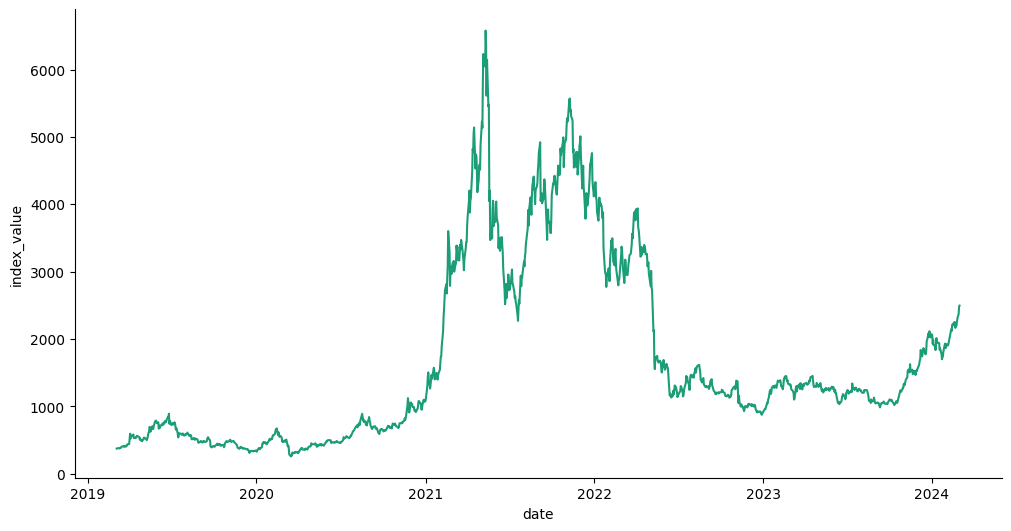

In [86]:
from matplotlib import pyplot as plt
import seaborn as sns

def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['index_value']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('index_value')